Sample data:
    Recency  Frequency    Monetary
0       14         11  291.516791
1       90         11  207.195809
2       39          5  253.578312
3       27         10  226.117128
4        5         11  273.948991


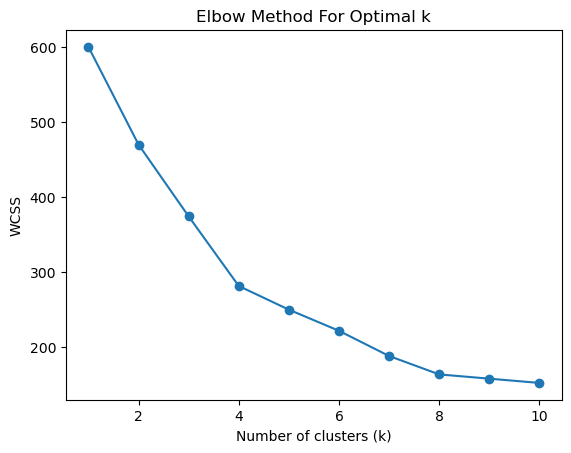


Cluster Centers (mean values per cluster):
           Recency  Frequency    Monetary
Cluster                                  
0        59.574468  10.382979  210.790020
1        25.000000   5.961538  249.734130
2        14.633663  11.099010  269.775636


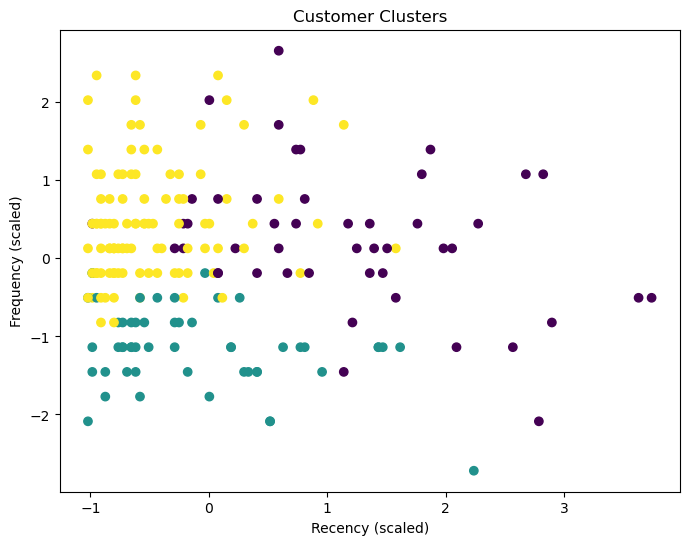

In [1]:
import os
import warnings

# Limit MKL to 1 thread to avoid known memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

# Optionally, suppress all warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate a synthetic dataset of customer purchase history
np.random.seed(42)  # For reproducibility
n_customers = 200

# Simulate Recency (days since last purchase)
recency = np.random.exponential(scale=30, size=n_customers).astype(int)

# Simulate Frequency (number of purchases)
frequency = np.random.poisson(lam=10, size=n_customers)

# Simulate Monetary value (average amount spent)
monetary = np.random.normal(loc=250, scale=50, size=n_customers)
monetary = np.clip(monetary, a_min=10, a_max=None)  # No negative values

# Create a DataFrame
df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

# Show some sample data
print("Sample data:\n", df.head())

# Prepare data for clustering
X = df.copy()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

# Select the number of clusters (for example, 3)
k_opt = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Show the mean values per cluster
print("\nCluster Centers (mean values per cluster):")
print(df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean())

# Visualize the clusters (first two features)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.title('Customer Clusters')
plt.show()